Original vector length:  2865008 samples
Input shape: (560000, 2)
Output shape: (560000, 1)


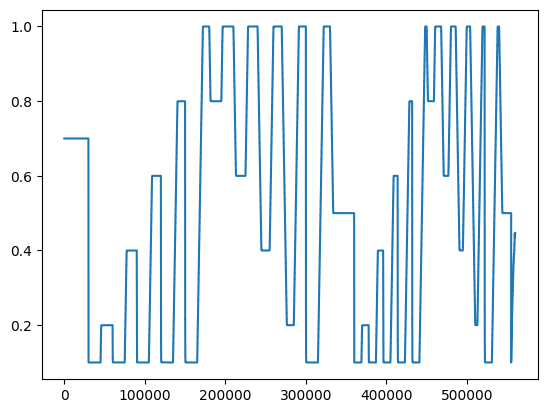

In [7]:
import wget
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, SimpleRNN, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tqdm.notebook import tqdm

from tcn import TCN
from sklearn.model_selection import train_test_split
from tensorflow_addons.layers import ESN


data = loadmat('C:/Users/Juan Camilo/Desktop/Papers for tesis/Electric Car Batteries/Motor Control/MATLAB_MODEL/MotorDataSet.mat')
array_data = data['Motordata']

print('Original vector length: ',len(array_data[:,0]), 'samples')
len_i = 1440000
len_f = 2000000
plt.plot(array_data[len_i:len_f,0])

# data shape:    [Wref Wmeas Idref Iqref Idmeas Iqmeas Vd Vq] 
Wref = array_data[len_i:len_f,0]
Wmeas = array_data[len_i:len_f,1]
Idref = array_data[:,2]
Iqref = array_data[len_i:len_f,3]
Idmeas = array_data[:,4]
Iqmeas = array_data[:,5]
Vd = array_data[:,6]
Vq = array_data[:,7]

# Error signals (input of the PID)
Speed_error = np.subtract(Wref, Wmeas) 

# Organize input and output of NN
in1 = [Speed_error, Wref]
in1 = np.asarray(in1)
in1 = np.transpose(in1)

out1 = [Iqref]
out1 = np.asarray(out1)
out1 = np.transpose(out1)    

x = in1
y = out1

print('Input shape:', x.shape)
print('Output shape:', y.shape)

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= True)

model = Sequential()

model.add(Dense(64, input_dim = 2, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,  activation = 'linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, validation_split= 0.2, epochs = 200)

Epoch 1/200
11200/11200 [==============================] - 18s 2ms/step - loss: 1.2381e-04 - mse: 1.2381e-04 - val_loss: 9.7904e-05 - val_mse: 9.7904e-05
Epoch 2/200
11200/11200 [==============================] - 20s 2ms/step - loss: 9.6695e-05 - mse: 9.6695e-05 - val_loss: 9.5701e-05 - val_mse: 9.5701e-05
Epoch 3/200
11200/11200 [==============================] - 23s 2ms/step - loss: 9.1496e-05 - mse: 9.1496e-05 - val_loss: 8.6854e-05 - val_mse: 8.6854e-05
Epoch 4/200
11200/11200 [==============================] - 23s 2ms/step - loss: 8.9399e-05 - mse: 8.9399e-05 - val_loss: 8.9119e-05 - val_mse: 8.9119e-05
Epoch 5/200
11200/11200 [==============================] - 23s 2ms/step - loss: 8.8088e-05 - mse: 8.8088e-05 - val_loss: 8.8141e-05 - val_mse: 8.8141e-05
Epoch 6/200
11200/11200 [==============================] - 23s 2ms/step - loss: 8.7125e-05 - mse: 8.7125e-05 - val_loss: 8.4761e-05 - val_mse: 8.4761e-05
Epoch 7/200
11200/11200 [==============================] - 25s 2ms/step - lo

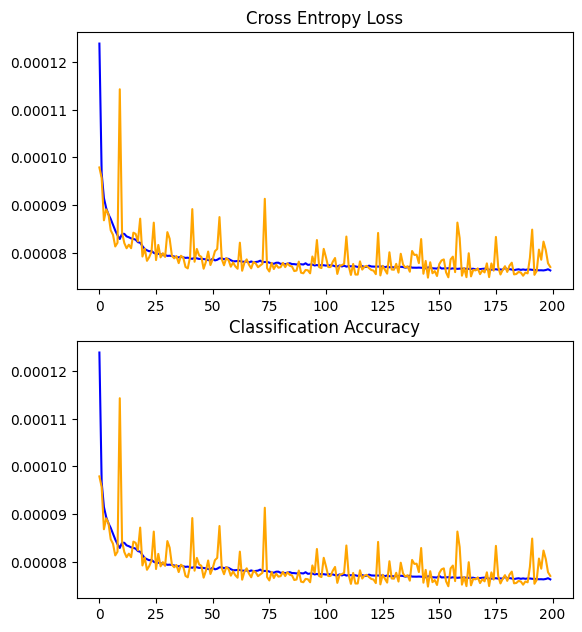

In [17]:
# plot loss
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy

pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['mse'], color='blue', label='train')
pyplot.plot(history.history['val_mse'], color='orange', label='test')

pyplot.subplots_adjust(left=None, bottom=-0.3, right=None, top=None, wspace=None, hspace=None)
plt. show()

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
#model.save('Speed_test_1.h5')

In [13]:
model2 = Sequential()

model2.add(Dense(32, input_dim = 3, activation = 'relu'))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1,  activation = 'linear'))

model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                128       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2.save('structure.h5')

In [4]:
matlabModel = model2.to_json()

In [10]:
matlabModel.save('structure.h5')

AttributeError: 'str' object has no attribute 'save'

In [8]:
from tensorflow.keras.models import model_from_json
modelito = model_from_json(matlabModel)

In [9]:
modelito.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________
